<center><h1>Information Search Engine</h1></center>

<center><h2>TME RI</h2></center>
<center><h3>ZHANG Xiao</h3></center>

In [2]:
from index import *

### 1. TME1 
##### Class Index( )

In [3]:
i=Index()
i.indexation()

<index.Index instance at 0x109aa1560>

In [4]:
# exemple
tf_doc=i.getTfsForDoc('1')
tf_stem=i.getTfsForStem('invari')

In [5]:
print tf_doc

{'samelson': 1, 'algebra': 1, 'preliminari': 1, 'perli': 1, 'intern': 1, 'report': 1, 'languag': 1}


### 2. Generate Queries

<li>Query</li>
<li>IRList</li>
<li>QueryCACM</li>   (Generalise touts les queries(id, relevants,text) de fichier cacm )

In [11]:
# from queryparser import *
# gq=QueryCACM()
# gq.relevants()
# gq.Querycacm()

In [12]:
gq.queries['1'].text

'What articles exist which deal with TSS (Time Sharing System), an operating system for IBM computers?'

In [11]:
# irl=IRList(gq.queries['1'],v.getRanking(gq.queries['1'].text))

###  3. Weighter


<li>Weighter() </li> 
<li>WeighterTf1()</li>
<li>WeighterTfTf()</li>
<li>WeighterTfIdf()</li>
<li>WeighterLogtfIdf()</li>
<li>WeighterLogtfidfLogtfidf()</li>



In [13]:
w=WeighterTf1()
w.construct()
w.getWeigtsForQuery(gq.queries['1'].text)

{'articl': 1,
 'comput': 1,
 'deal': 1,
 'exist': 1,
 'ibm': 1,
 'operat': 1,
 'share': 1,
 'time': 1,
 'tss': 1}

In [11]:
w1=WeighterTfTf()
w1.construct()
w1.getWeigtsForQuery(gq.queries['1'].text)

{'articl': 1,
 'comput': 1,
 'deal': 1,
 'exist': 1,
 'ibm': 1,
 'operat': 1,
 'share': 1,
 'time': 1,
 'tss': 1}

In [14]:
w2=WeighterTfIdf()
w2.construct()
w2.getWeigtsForQuery(gq.queries['1'].text)

{'articl': 2.7725887222397811,
 'comput': 0.69314718055994529,
 'deal': 2.6390573296152584,
 'exist': 2.3978952727983707,
 'ibm': 2.4849066497880004,
 'operat': 3.4965075614664802,
 'share': 2.3025850929940459,
 'time': 1.3862943611198906,
 'tss': 2.8332133440562162}

### 4. Models

<li>IRmodel</li>
<li>Vectoriel</li>
<li>LanguageModel</li>
<li>OkapiModel</li>
<li> GridSearch</li>

In [14]:
v=Vectoriel(weighter=WeighterTfTf())
v.construct()
v.WeightsNormfordocs() # 

KeyboardInterrupt: 

In [45]:
rank_v_58=v.getRanking(gq.queries['58'].text)

Calculate time is: 0.0527398586273


In [147]:
vn=Vectoriel(weighter=WeighterTfTf(),normalised=True)
vn.construct()
vn.WeightsNormfordocs() # 

<irmodel.Vectoriel instance at 0x126bb95a8>

In [152]:
# vn.weightsdocs['3873']

In [153]:
rank_vn_58=vn.getRanking(gq.queries['58'].text)

In [47]:
from languagemodel import *
lm=LanguageModel(weighter=WeighterTfTf())
lm.construct()
lm.prepare()

<languagemodel.LanguageModel instance at 0x11099f710>

In [48]:
import time
t0=time.time()
rank_lm_58=lm.getRanking(gq.queries['58'].text)
print "calcule time :",time.time()-t0

calcule time : 20.4689757824


In [49]:
from okapimodel import *
ok=OkapiModel(weighter=WeighterTfTf())
ok.construct()
ok.prepare()

<okapimodel.OkapiModel instance at 0x115791200>

In [50]:
import time
t0=time.time()
rank_ok_58=ok.getRanking(gq.queries['58'].text)
print "calcule time :",time.time()-t0

calcule time : 21.3161578178


### 5. Random Walk

<li>Pagerank</li>
<li>Hits</li>
<li>Random Walk Model</li>

In [1]:
from ramdomwalk import *

In [30]:
prank = PageRank(10,0.85)
mu=prank.randomwalk(i.linkout,i.linkin)
# mu = pr.randomWalk(succ, pred)

In [5]:
hit=HITS(10)
a=hit.randomwalk(i.linkout,i.linkin)

In [137]:
w=WeighterTfTf()
v=Vectoriel(weighter=WeighterTfTf())
v.construct()
v.WeightsNormfordocs()


In [37]:
mrw=ModelRandomWork(irmodel=v,index=w1.index,weighter=w,randomwalk=prank,nb_seeds=1000,k=50)## Random walk mesure is 
rank_mrw_58=mrw.getRanking(gq.queries['58'].text)

<index.Index instance at 0x1157cbe60>
Calculate time is: 0.0249888896942


In [236]:
mrw=ModelRandomWork(irmodel=ok,index=w1.index,weighter=w,randomwalk=prank,nb_seeds=1000,k=50)## Random walk mesure is 
# rank_mrw_58=mrw.getRanking(gq.queries['58'].text)

In [238]:
rank_mrw_ok_58=mrw.getRanking(gq.queries['58'].text)

<index.Index instance at 0x174df3ef0>


### 6. Model Evaluation

<li>PrecisionRecall</li>
<li>MeanPrecision</li>
<li>EvalIRModel</li>

In [15]:
pr=PrecisionRecall(10)
pm=PrecisionMean()

In [154]:
irl=IRList(gq.queries['58'],rank_v_58)
irl2=IRList(gq.queries['58'],rank_lm_58)
irl3=IRList(gq.queries['58'],rank_ok_58)
irl4=IRList(gq.queries['58'],rank_mrw_58)
irl6=IRList(gq.queries['58'],rank_vn_58)

In [240]:
# irl7=IRList(gq.queries['58'],rank_mrw_ok_58)
# pr.eval(irl7)

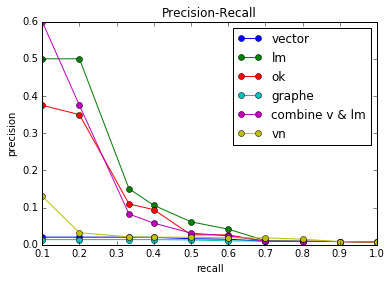

In [155]:
plt.plot()
pr.eval(irl)
pr.eval(irl2)
pr.eval(irl3)
pr.eval(irl4)
pr.eval(irl5)
pr.eval(irl6)
plt.title("Precision-Recall")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(['vector','lm','ok','graphe','combine v & lm','vn'])

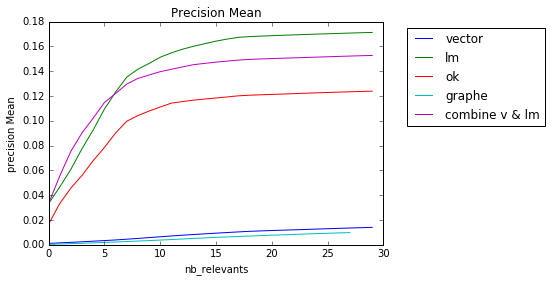

In [235]:
pm.eval(irl)
pm.eval(irl2)
pm.eval(irl3)
pm.eval(irl4)
pm.eval(irl5)
plt.title('Precision Mean')
plt.xlabel("nb_relevants")
plt.ylabel("precision Mean")
plt.legend(['vector','lm','ok','graphe','combine v & lm'],bbox_to_anchor=(1.5, 1))

In [125]:
from queryparser import EvalIRModel
t0=time.time()
er=EvalIRModel(model=v,evalu='pr') ## Model is Vectoriel/ language/ okapi/combination; evalution mesure:
result_v=er.eveluation(gq.queries)
t=time.time()-t0
print "Vector Model execution time:",t

Vector Model execution time: 2.33007788658


In [189]:
from queryparser import EvalIRModel
t0=time.time()
er=EvalIRModel(model=lm,evalu='pr') ## Model is Vectoriel/ language/ okapi/combination; evalution mesure:
result_lm=er.eveluation(gq.queries)
t=time.time()-t0
print "Language Model execution time:",t

Language Model execution time: 638.014038086


In [190]:
from queryparser import EvalIRModel
t0=time.time()
er=EvalIRModel(model=ok,evalu='pr') ## Model is Vectoriel/ language/ okapi/combination; evalution mesure:
result=er.eveluation(gq.queries)
t=time.time()-t0
print "Okapi Model execution time:",t

Okapi Model execution time: 714.929833889


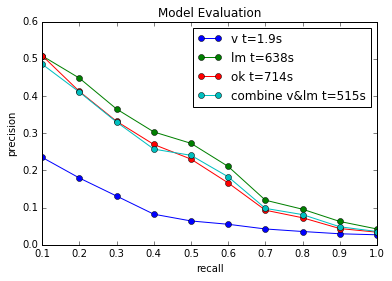

In [193]:
x=np.arange(0.1,1.1,0.1)
plt.plot(x,result_v[0],'-''o')
plt.plot(x,result_lm[0],'-''o')
plt.plot(x,result[0],'-''o')
plt.plot(x,result_lmm_all[0],'-''o')


plt.title('Model Evaluation')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(['v t=1.9s','lm t=638s','ok t=714s','combine v&lm t=515s'])

In [201]:
# from gridsearch import*
# gs=GridSearch(irmodel='okapi',evalmeasure='pr',queries=train_queries)
# gs.optimisation()

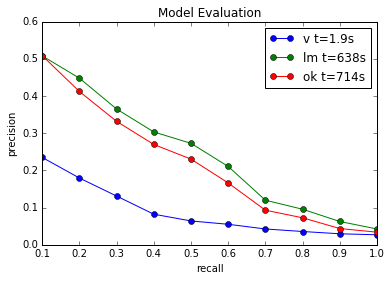

In [183]:
x=np.arange(0.1,1.1,0.1)
plt.plot(x,result_v[0],'-''o')
plt.plot(x,result_lm[0],'-''o')
plt.plot(x,result[0],'-''o')
plt.plot(x,result_lmm_all[0],'-''o')


plt.title('Model Evaluation')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(['v t=1.9s','lm t=638s','ok t=714s',])

### 7. Combination

<li>Feature</li>
<li>FeatureDoc</li>
<li>FeatureQuery</li>
<li>FeatureModel</li>
<li>FeatureList</li>
<li>Meta Model</li>

In [70]:
from combination import *

In [77]:
fm=FeaturerModel(model=v,weighter=w1,index=i)
fm2=FeaturerModel(model=lm,weighter=w1,index=i)
featurers=[fm,fm2]
fl=FeaturerList(featurers)

In [ ]:
lmm.sgd[]

In [82]:
lmm=LinearMetaModel(i,fl)
lmm.sgd(gq.queries)

In [79]:
rank_lmm_58=lmm.getRanking(gq.queries['58'].text)

Calculate time is: 0.150146007538


In [130]:
# irl5=IRList(gq.queries['58'],rank_lmm_58)
# pr.eval(irl5)

In [171]:
from sklearn.cross_validation import train_test_split
train_indice,test_indice=train_test_split(gq.queries.keys(),test_size=0.3)
# train 
train_queries={}
test_queries={}
for key in train_indice:
    train_queries[key]=gq.queries[key]
for key in test_indice:
    test_queries[key]=gq.queries[key]

In [227]:
lmm_1=lmm=LinearMetaModel(index=i,featurerlist=fl)

In [228]:
# sgd_resul=lmm.sgd(gq.queries)
# loss=[]
# for i in range(100):
#     loss.append(lmm.sgd(gq.queries)[1])

In [229]:
# plt.plot(loss)

In [220]:
sgd_resul[0]

array([ 0.00010999,  0.00017345])

In [187]:
t0=time.time()
er=EvalIRModel(model=lmm,evalu='pr') ## Model is Vectoriel/ language/ okapi/combination; evalution mesure:
result_lmm_all=er.eveluation(gq.queries)
t=time.time()-t0
print "Combined Model execution time:",t

Combined Model execution time: 515.236597061


In [176]:
er=EvalIRModel(model=lmm,evalu='pr') ## Model is Vectoriel/ language/ okapi/combination; evalution mesure:
result_lmm=er.eveluation(test_queries)

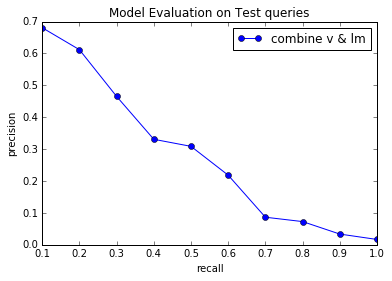

In [184]:
x=np.arange(0.1,1.1,0.1)
plt.plot(x,result_lmm[0],'-''o')
plt.title('Model Evaluation on Test queries')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(['combine v & lm'])

In [ ]:
w=WeighterTfTf()
w.construct()
i=Index()
i.indexation()
m=Vectoriel(weighter=w)
m.construct()
m.WeightsNormfordocs()
w1=WeighterLogtfIdf()
w1.construct()
fm=FeaturerModel(model=m,weighter=w,index=i)
fm2=FeaturerModel(model=m,weighter=w1,index=i)
featurers=[fm,fm2]
fl=FeaturerList(featurers)